## Week 6 Exercises

###<font color=green> Replace the name below with **your name**. For full credit, your total needs to add up to 100 points.

I highly recommend reading the accompanying pdf for programming notes and other important details.

# Chien-Shiung Wu            

<font color=purple> *Chien-Shiung Wu, 吳健雄, 1912 - 1997, Chinese-American experimental particle physicist. She is best known for conducting the experiment that first detected parity violation in beta decay. C.N. Yang and T.D. Lee went on to win the 1957 Nobel prize for their theoretical prediction of parity violation in the weak interaction, but C.S. Wu's work was not acknowledged by the Nobel Foundation. C.S. Wu got her Ph.D. at UC Berkeley in 1940, and her first faculty position was at Smith College. In 1944, she joined the Manhattan Project at the Substitute Alloy Materials (SAM) Lab at Columbia University, where she made many significant contributions as a member of the faculty. She also served as the first female president of the American Physical Society.*

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy import e, pi, log, sin, cos, exp, sqrt

**1. Numerical integration: Error functions**

Do a numerical integration using  `scipy.integrate.quad()`.

a. *(5 points)* This is an adaptation of Newman Exercise 5.3. Compute the error function:
$$
Erf(x) = \int_0^x e^{-t^2} dt
$$
for values of $x$ ranging from 0 to 3 in steps of 0.5.  
To do this, define the integrand as a function of $t$, then run your integration routines in a `for` or `while` loop with a varying upper limit $x$ of integration.

b. *(5 points)* Plot your result as a function of $x$.

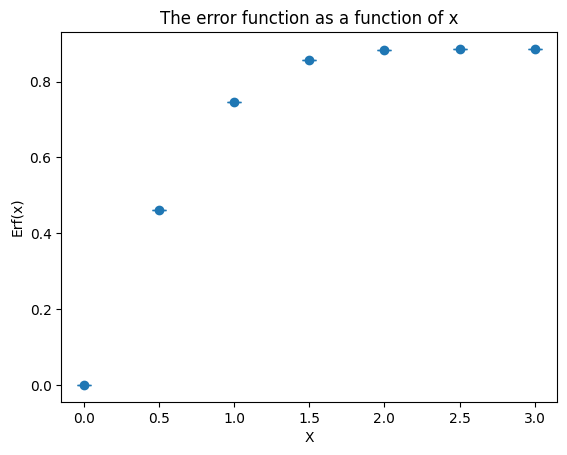

In [50]:
def a1(t):
    return(exp(-t*t))


def Erf(lower, upper, steps):
    step_vals = np.arange(lower, upper + steps, steps)
    vals = []
    uncertainty = []

    for x in step_vals:
        integral, error = scipy.integrate.quad(a1, 0, x)
        vals.append(integral)
        uncertainty.append(error)

    return np.array(step_vals), np.array(vals), np.array(uncertainty)

def plotErf(lower, upper, steps):
    X, Y, yerr = Erf(lower, upper, steps)
    plt.figure()
    plt.xlabel("X")
    plt.ylabel("Erf(x)")
    plt.title("The error function as a function of x")
    plt.errorbar(X, Y, yerr, fmt='o', capsize=5)
    plt.show()


plotErf(0, 3, 0.5)

**2. Numerical integration:
Trapezoidal rule and Simpson's rule vs `scipy.integrate.quad()`.**

The complete elliptic integral of the second kind $E(m)$ is defined as
$$
E(m) = \int_0^{\pi/2}[1-m\sin(t)^2]^{1/2}dt
$$
and is available as the special function `scipy.special.ellipe(m)`.

Write a program that computes and prints out $E(0.9999)$ four different ways:

a. (5 points) An ``exact'' value using `scipy.special.ellipe(m)`.

b. (5 points) A trapezoidal-rule evaluation of the integral above, slicing the integration domain into $N$ intervals.

c. (5 points) A Simpson's-rule evaluation of the integral, also using $N$ intervals.

d. (5 points) Use `scipy.integrate.quad()` to evaluate the integral.

Use $N = 10$, 100 and 1000 in the trapezoidal and Simpson's rule routines. Compare your results obtained from the four different methods.

In [48]:
#A
print(f"scipy.special: {scipy.special.ellipe(0.9999)}")
print()

#B
def b2Integrand(t):
    return sqrt(1-0.9999*sin(t)*sin(t))

def trapezoidal(func, a, b, intervals):
    tempCount = a
    traps = func(a)
    Dx = (b-a) / intervals
    while tempCount<=b:
        tempCount+=Dx
        traps+=2*func(tempCount)
    traps+=func(b)
    traps*=Dx/2
    return traps

print(f"trapezoidal: {trapezoidal(b2Integrand, 0, pi/2, 10)}")
print(f"trapezoidal: {trapezoidal(b2Integrand, 0, pi/2, 100)}")
print(f"trapezoidal: {trapezoidal(b2Integrand, 0, pi/2, 1000)}")
print()
#C
def simpsons(func, a, b, intervals):
    if intervals % 2 == 1:
        intervals += 1  

    Dx = (b - a) / intervals
    simps = func(a) + func(b)

    for i in range(1, intervals):
        x_i = a + i * Dx
        weight = 4 if i % 2 == 1 else 2
        simps += weight * func(x_i)

    return (Dx / 3) * simps

print(f"simpsons: {simpsons(b2Integrand, 0, pi/2, 10)}")
print(f"simpsons: {simpsons(b2Integrand, 0, pi/2, 100)}")
print(f"simpsons: {simpsons(b2Integrand, 0, pi/2, 1000)}")
print()

#D
val = scipy.integrate.quad(b2Integrand, 0, pi/2)[0]
print(f"scipy.integrate: {val}")

scipy.special: 1.000274582430663

trapezoidal: 1.0250268759092727
trapezoidal: 1.0007235124127811
trapezoidal: 1.0003061909462627

simpsons: 1.0006445406722306
simpsons: 1.000278631539761
simpsons: 1.000274582430664

scipy.integrate: 1.0002745824307404


**3. Newman 5.9: Heat capacity of a solid.**

Here is Newman's statement of the problem:
Debye's theory of solids says the heat capacity of a solid at
temperature $T$ is
$$
C_V = 9V\rho k_B \biggl( \frac{T}{\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      x^4 \frac{e^x}{(e^x-1)^2} d x,
$$
where $V$ is the volume of the solid, $\rho$~is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
*Debye* temperature, a property of solids that depends on their
density and speed of sound.

a. (5 points) Write a Python function that calculates~$C_V$ for a
  given value of the temperature.  Compute this value for a sample consisting of $1000 \textrm{ cm}^3$ of solid aluminum, which has number density
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature
  $\theta_D=428\,$K.  Bundle all these values into a single multiplicative constant.
  
  Use `scipy.integrate.quad()` to evaluate the integral, rather than using Gaussian quadrature as stated in the original problem. This is because `scipy.integrate.quad()` is a good general-purpose integrator that will automatically pick a numerical method suitable for many types of problem.  

b. (5 points) Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K. Make sure to have labels for your axes and a title for the plot.

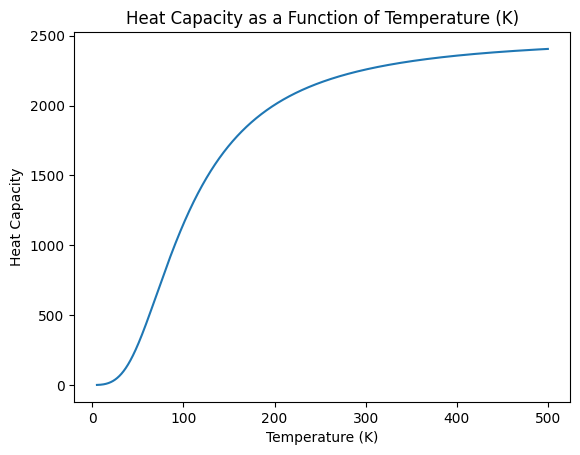

In [66]:
def heatCapacity(V, p, k, theta, Temp):
    def a3integrand(x):
        return x**4 * exp(x) / ((exp(x) - 1)**2)
    
    integral, _ = scipy.integrate.quad(a3integrand, 0, theta / Temp)
    beforeInt = 9 * V * k * p * (Temp / theta)**3
    return integral * beforeInt

def setValsHeat(T):
    V = 1e-3
    rho = 6.022e28  # Scientific notation for readability
    theta = 428
    boltzmann = 1.380649e-23
    
    heat_capacity_vec = np.vectorize(heatCapacity)  # Vectorize function for array inputs
    return heat_capacity_vec(V, rho, boltzmann, theta, T)

def plotb3(lower, upper):
    if lower>upper:
        lower, upper = upper, lower
    Temp = np.linspace(lower, upper, (upper - lower) * 10 + 1)
    heatCap = setValsHeat(Temp)
    
    plt.figure()
    plt.title("Heat Capacity as a Function of Temperature (K)")
    plt.plot(Temp, heatCap)
    plt.ylabel("Heat Capacity")
    plt.xlabel("Temperature (K)")
    plt.show()

plotb3(5, 500)


**4. Computing Bessel functions.**

For this problem, plot the Bessel function of the first kind, $J_1(x)$, over the range $0\leq x\leq 20$ by computing it three different ways.

a. (5 points) Use the `scipy.special` function for $J_1(x)$.

b. (5 points)  Compute $J_1(x)$ from its integral representation
$$
J_1(x) = \frac{1}{\pi}\int_0^\pi \cos(u - x\sin u)\ du.
$$
Write \emph{your own code} to evauate this integral using Simpson's rule (you may not using the Simpson's integrators in `scipy.integrate`).

c. (5 points)  Again compute $J_1(x)$ from the integral representation, but now use \verb7scipy.integrate.quad()7 to evaluate the integral.

d. (5 points) Show all three plots on the same graph. Since the three curves will fall almost exactly on top of each other, they will be almost impossible to distinguish.
To fix this, add small constant offsets (e.g. 0.01 and 0.02 - whatever is just enough to see three distinct curves) to the second and third curves.
Your plot should have a legend for each curve, and the legend should specify what offsets have been used for each (i.e. remember to mention the additive constant).


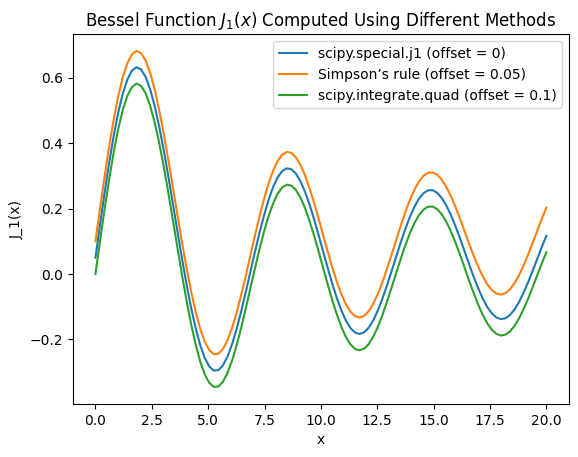

In [41]:
#A
def a4Int(x):
    return scipy.special.j1(x)


#B
def b4Integrand(u, x):
    return np.cos(u - x * np.sin(u))

def simpsons_rule(func, a, b, n, x):
    """Numerically integrate using Simpson's rule."""
    if n % 2 == 1:  # Simpson's rule requires an even number of intervals
        n += 1
    h = (b - a) / n
    s = func(a, x) + func(b, x) + 4 * sum(func(a + i * h, x) for i in range(1, n, 2)) + 2 * sum(func(a + i * h, x) for i in range(2, n-1, 2))
    return (h / 3) * s

def b4Simpsons(x, intervals):
    return (1 / np.pi) * simpsons_rule(b4Integrand, 0, np.pi, intervals, x)

#C

def c4Int(x):
    integral, _ = scipy.integrate.quad(b4Integrand, 0, np.pi, args=(x,))
    return integral / np.pi

#D
def d4Plotting(num, intervals):
    xVals = np.linspace(0, 20, num)
    y1 = np.array([a4Int(i) for i in xVals])
    y2 = np.array([b4Simpsons(i, intervals) for i in xVals])
    y3 = np.array([c4Int(i) for i in xVals])
    
    y1+=0.05
    y2+=0.1

    plt.figure()
    plt.title(r"Bessel Function $J_1(x)$ Computed Using Different Methods")
    plt.plot(xVals, y1, label='scipy.special.j1 (offset = 0)')
    plt.plot(xVals, y2, label='Simpson’s rule (offset = 0.05)')
    plt.plot(xVals, y3, label='scipy.integrate.quad (offset = 0.1)')
    plt.xlabel("x")
    plt.ylabel("J_1(x)")
    plt.legend()
    plt.show()

d4Plotting(100, 20)

**5. Newman 5.4(b): The diffraction limit of a telescope.** *10 points*

Here is the statement of the problem, from Newman Chapter 5:

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( \frac{J_1(kr)}{kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.

The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m\theta - x\sin\theta) d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.

Make a density plot showing the intensity of
  the circular diffraction pattern of a point light source with
  $\lambda=500$ nm, in a square region of the focal plane, using the
  formula given above.  Your picture should cover values of $r$ from zero
  up to about $1\,\mu$m. For this plot, compute $J_1(x)$ from its integral representation, with the integral evaluated using `scipy.integrate.quad()`. (See hints in week6.pdf).

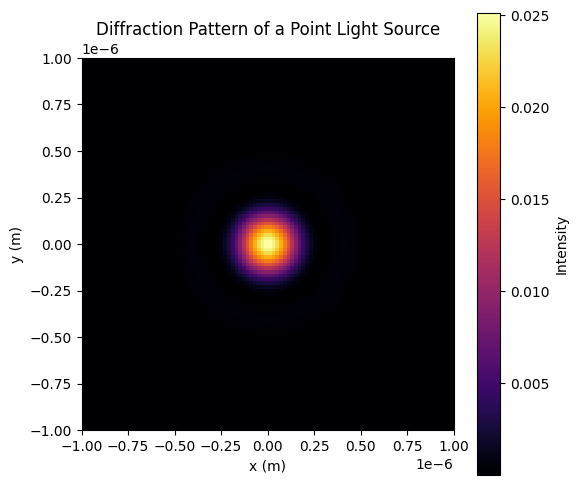

In [67]:
def integrand5(theta, x):
    return np.cos(theta - x*np.sin(theta))

def besselVal(x):
    integral, _ = scipy.integrate.quad((integrand5), 0, np.pi, args=(x,))
    return integral/pi

besselVal_vec = np.vectorize(besselVal)


def intensity(l, r):
    k = 2*pi/l
    return (besselVal_vec(k * r) / (pi*(k * r)))**2

def a5Plot():
    x = np.linspace(-1e-6, 1e-6, 100)
    y = np.linspace(-1e-6, 1e-6, 100)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    I = intensity(500e-9, R)

    plt.figure(figsize=(6, 6))
    plt.imshow(I, extent=[-1e-6, 1e-6, -1e-6, 1e-6], origin='lower', cmap='inferno')
    plt.colorbar(label="Intensity")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title("Diffraction Pattern of a Point Light Source")
    plt.show()


a5Plot()


**6. Newman 3.6: Logistic map and deterministic chaos (10 points)**

One of the most famous examples of the phenomenon of chaos is the
**logistic map**, defined by the equation
\begin{equation}
x' = rx(1-x).
\end{equation}
For a given value of the constant $r$ you take a value of $x$, say
$x=1/2$, and you feed it into the right-hand side of this equation,
which gives you a value of $x'$.  Then you take that value and feed it back
in on the right-hand side again, which gives you another value, and so
forth.  This is an **iterative map**.  You keep doing the same
operation over and over on your value of $x$, and one of three things
happens:
- The value settles down to a fixed number and stays there.  This is
  called a **fixed point**.  ($x = 0$ and $x = 1$ are fixed points.)
- It doesn't settle down to a single value, but it settles down into a
  periodic pattern, rotating around a set of values, such as say four
  values, repeating them in sequence over and over.  This is called a
  **limit cycle**.
- It generates a seemingly random sequence of numbers
  that appear to have no rhyme or reason to them at all.  This is
  **deterministic chaos**.  ``Chaos'' because it really does look
  chaotic, and ``deterministic'' because even though the values look
  random, they're not.  The outcome is **determined**, because
  it comes from one simple equation.


Write a program that calculates and displays the behavior of the logistic
map.  You will explore this map for values of $r$
that range from 1 to 4 in steps of 0.01. See details in **week6.pdf**

Try and answer the following question posed by Newman (in a markdown cell):
Based on your plot, at what value of $r$ does the system move from
  orderly behavior (fixed points or limit cycles) to chaotic behavior?
  This point is sometimes called the ``edge of chaos.''

/var/folders/wv/93tp0mvj0176s65wrdy9sffh0000gn/T/ipykernel_22002/764835757.py:12: RuntimeWarning: overflow encountered in scalar multiply
  x = r * x * (1 - x)


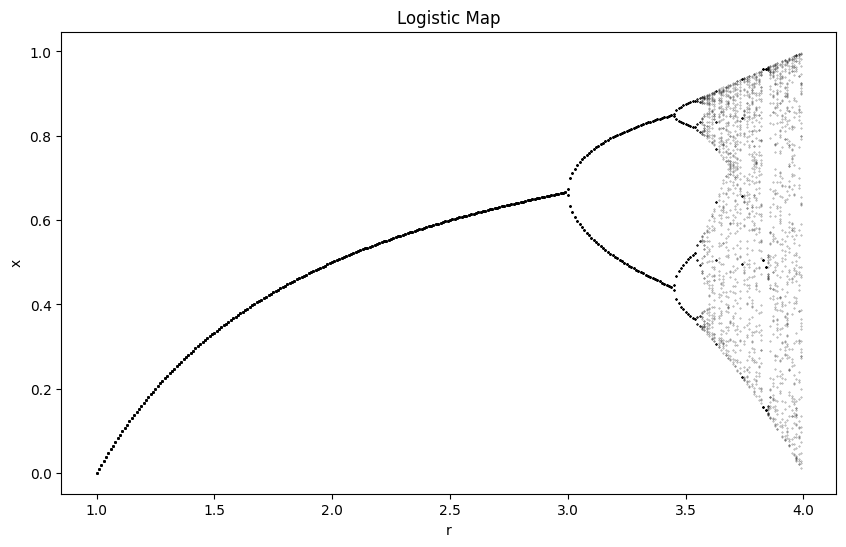

In [68]:
def plot6(numIter, last = 50):
    rVal =np.arange(1,4.01, 0.01)
    xInitial=0.5
    r_list = []
    x_list = []
    xHold = []
    temp = 0

    for r in rVal:
        x = xInitial
        for _ in range(numIter):  
            x = r * x * (1 - x)
            if _ >= numIter - last:  
                x_list.append(x)
                r_list.append(r)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(r_list, x_list, s=0.1, color='black', alpha=0.5)
    plt.xlabel("r")
    plt.ylabel("x")
    plt.title("Logistic Map")
    plt.show()

plot6(1000)

**7. Plotting the Mandelbrot Set (Newman 3.7) (20 points)**

The following problem implements an iterative map, and uses it to define a set of points on the plane, resulting in a beautiful plot which is an example of a fractal.  There are many ways to solve the problem - surprise me with something that is simple and effective.

You can solve this using complex numbers with a single iterative equation or with two iterative equations where everything is purely real. You can also write a vectorized version of the code. These methods are described in detail in **week6.pdf**. Pick ONE method, describe your approach in a markdown cell, and include comments in the body of the code that demonstrate that you understand what you are doing.

The Mandelbrot set, named after its discoverer, the French
mathematician Benoit Mandelbrot, is an example of a *fractal*.
It is defined by an iterative map: give $z_n$, you generate a $z_{n+1}$.  In terms of complex numbers $z$,  this iterative map is:
\begin{equation}
z_{n+1} = z_n^2 + C,
\end{equation}
where the complex constant $C$ represents a point $(x,y)$ on the 2D plane.

Given a point $(X,Y)$ on the plane,  define $C =  X + i Y = z_0$.  Feed both thse values
into the right hand side of the above equation to get a new value $z_1$. This process repeats until **either** the magnitude of the new value of $z$ exceeds 2, **or** we reach a maximum number of allowed iterations.  When $|z| >2$, we move to a new value of $C$, and run the iterative map again. The Mandelbrot
set is the set of all complex numbers $C$ such that the magnitude~$|z|$ remains *less than* 2 in the allowed number of iterations.  If our value of $C$ is such that the magnitude of $z$ eventually exceeds 2, we keep track of the number of iterations $n$ that have occurred when this happens, and label $C = (X, Y)$ by that number $n$.

Make a picture of the Mandelbrot set for a given region of 2D space.  This will involve creating a 2D grid of points, and labeling each by the number $n$ that represents the number of iterations after which the point left the set.  If the point never leaves the set, label it by the maximum number of iterations, or by zero. Once this grid of values is defined,  create a density plot using `imshow()` which should generate the fractal.

Details in **week6.pdf**

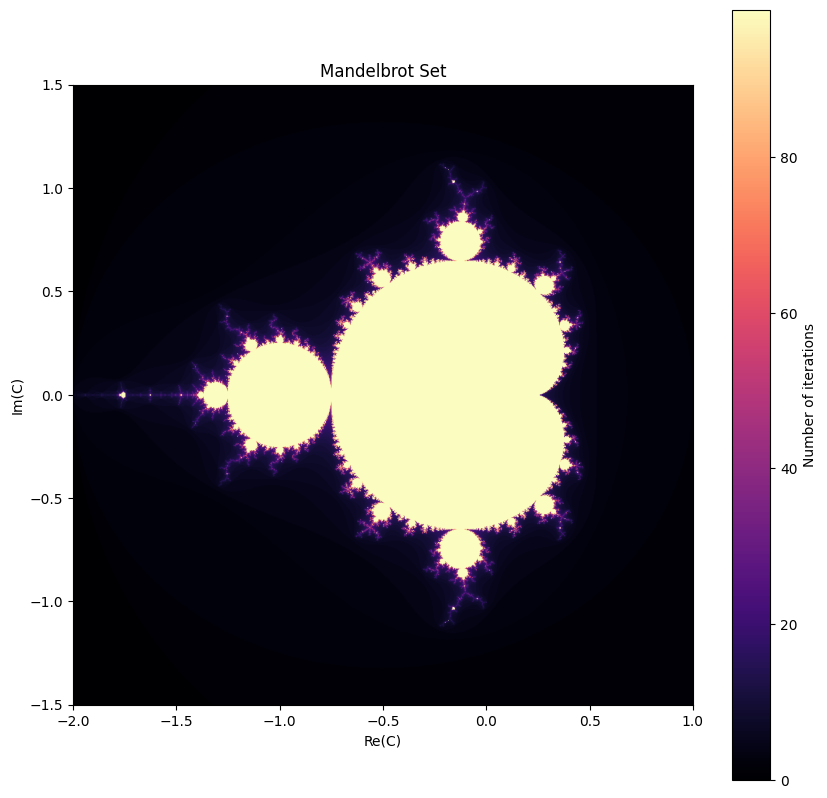

In [70]:
def mandelbrot(xMin, xMax, yMin, yMax, width, height, maxIter):

    #Establishing the complex grid
    x = np.linspace(xMin, xMax, width)
    y = np.linspace(yMin, yMax, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j*Y #Complex Plane

    Z = np.zeros_like(C, dtype=np.complex128) #creates Z, a set of complex numbers with the same size as C
    finalSet = np.full(C.shape, maxIter, dtype = int)

    for i in range(maxIter):
        mask = np.abs(Z)<= 2 #This is so I can check for values only less than or equal to 2
        Z[mask] = Z[mask]**2 + C[mask]
        finalSet[mask] = i 

    return finalSet

# Define parameters
xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
width, height = 1000, 1000
max_iter = 100

# Compute Mandelbrot set
mandelbrot_image = mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)

# Plot the Mandelbrot fractal
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_image, cmap="magma", extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label="Number of iterations")
plt.title("Mandelbrot Set")
plt.xlabel("Re(C)")
plt.ylabel("Im(C)")
plt.show()





**8. Newman 10.5: Monte Carlo Integration Take 1**

a. (5 points)} Write a program to evaluate the following integral using a
  ``hit-or-miss'' Monte Carlo method with $N = 10\,000$ points:
$$
  I =  \int_{0}^{2} \sin^2{\left [\frac{1}{x(2-x)} \right ]} dx
$$
Note that the maximum value of the integrand is 1, and the minimum value is 0.  The integral $I$ represents the area under the curve defined by the integrand, which will be estimated by random sampling.  

Pick a pair of values $(x,y)$ at random in the range of values defined by the rectangle bounding the function $f(x)$ to be integrated. For each one of $N$ randomly selected points, check whether the randomly selected $y$ lies under the curve (i.e.  if $y < f(x)$), and if so, count it.  If $k$ of $N$ values lie under the curve, then $k/N = I/A$ where $A$ is the area of the bounding rectangle (in this case, $A = 2$). Your estimate of the integral is then $I = kA/N$.
  
b. (5 points) Now estimate the integral again using the mean value method with
  $10\,000$ points.  The mean value method is defined as follows: given
$$
  I =  \int_{a}^{b} f(x) dx
$$
we can estimate $I$ by sampling $f(x)$ at $N$ points $x_1\dots x_N$ chosen at random between $a$ and $b$. Then we estimate $I$ as follows:
$$
 I =  \frac{b-a}{N}\sum_{i =1}^N f(x_i)
$$

c. (5 points) Evaluate the error in both cases (see Newman section 10.2). You should find that the error is somewhat smaller using the mean value
method.


**9. Revisiting finding $\pi$ using Monte Carlo methods**

a. (10 pts) Estimate
the area of a
circle of unit radius using Monte Carlo methods. This will also allow you to estimate $\pi$.

The area of a circle is given by the integral
$$
I = \iint_{-1}^{+1} f(x,y) dx dy
$$
where $f(x,y)=1$ everywhere inside the circle and zero everywhere outside.
In other words,
$$
f(x,y) = \biggl\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $x^2+y^2\le1$,} \\
           0 &\qquad\mbox{otherwise.}
         \end{array}
$$
Calculate the area of a circle
by Monte Carlo integration.  Generate a set of $N$ random points
$(x,y)$, where both $x$ and $y$ are in the range -1 to 1.  Then estimate the
integral from:
$$
I \simeq {A\over N} \sum_{i=1}^N f(x_i,y_i).
$$
where $A=4$ is the area over which the function $f(x,y)$, which defines the circle, is integrated over.

b. (10 points) Generalize this method to the ten-dimensional case and write a program to
perform a Monte Carlo calculation of the volume of a sphere of unit radius
in ten dimensions.
If we had to do a ten-dimensional integral the traditional way, it would
take a very long time.  Even with only 100 points along each axis (which
wouldn't give a very accurate result) we'd still have $100^{10} = 10^{20}$
points to sample, which is impossible on any computer.  But using the Monte
Carlo method we can get a pretty good result with a million points or so.